## Observations and Insights 

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from matplotlib import pyplot as plt

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [97]:
# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'inner')
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [98]:
# Checking the number of mice in the DataFrame.
total_mouse = complete_data['Mouse ID'].nunique()
total_mouse

249

In [99]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = sum(complete_data.duplicated())
duplicated_data

1

In [100]:
# Optional: Get all the data for the duplicate mouse ID. 
find_duplicated_data = complete_data.loc[complete_data.duplicated(),:]
find_duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [101]:
# Optional: Get all the data for the duplicate mouse ID. 
find_duplicated_data = complete_data.iloc[909,:]
find_duplicated_data

Mouse ID                  g989
Drug Regimen          Propriva
Sex                     Female
Age_months                  21
Weight (g)                  26
Timepoint                    0
Tumor Volume (mm3)          45
Metastatic Sites             0
Name: 909, dtype: object

In [102]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.




## Summary Statistics

In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = complete_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

median = complete_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

variance = complete_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

standard_deviation = complete_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']

sem = complete_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_statistics = pd.DataFrame({'Mean': mean,
                                   'Median': median,
                                   'Variance': variance, 
                                   'Standard Deviation': standard_deviation,
                                   'SEM': sem})

summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

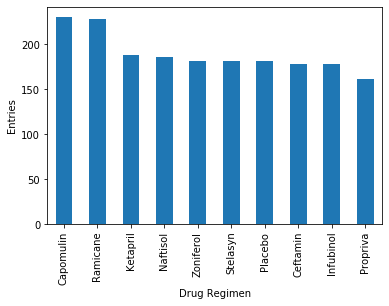

<Figure size 432x288 with 0 Axes>

In [104]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_graph = complete_data['Drug Regimen'].value_counts()
bar_graph.plot(kind = 'bar')
plt.xlabel("Drug Regimen")
plt.xticks(rotation= 90)
plt.ylabel("Entries")

plt.show()
plt.tight_layout()


In [105]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = summary_statistics.index.tolist()
regimen_count = complete_data.groupby(['Drug Regimen'])['Age_months'].count().tolist()

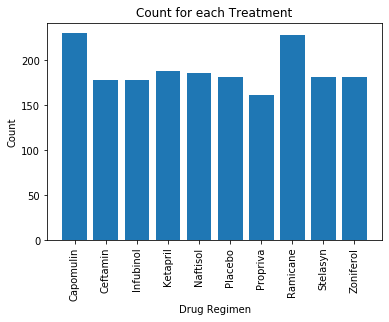

In [106]:
plt.bar(x_axis, regimen_count)

_ = plt.xticks(rotation = 90)


plt.title("Count for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.show()

## Pie Plots

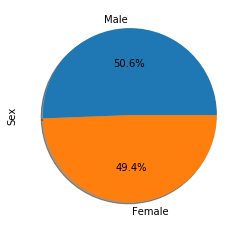

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = complete_data['Sex'].value_counts()
gender_df.plot(kind = 'pie', shadow = True, autopct = '%1.1f%%')


(-1.1874943525713364,
 1.1105268056883157,
 -1.1938032889323704,
 1.112116577938631)

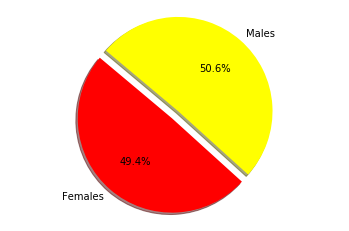

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


complete_data['Sex'].value_counts()


labels = ['Females', 'Males']

sizes = [935, 958]

colors = ['Red', 'Yellow']

explode = (0.1, 0)

plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', explode=explode,shadow=True, startangle=140)

plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [109]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [110]:
complete_data.head()




sorted_df = complete_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

In [111]:
# Select final volume of each mouse 
max_df = sorted_df.loc[sorted_df['Timepoint'] == 45]
max_df.head().reset_index()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


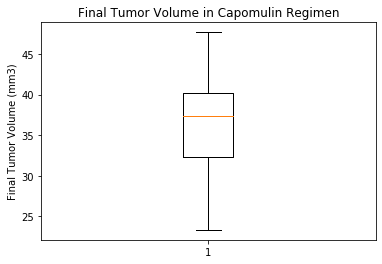

In [112]:
cap_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
cap_list

quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()





The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The the median of temperatures is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


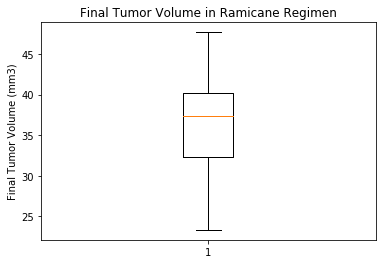

In [113]:
ram_data_df = max_df[max_df['Drug Regimen'].isin(['Ramicane'])]
ram_data_df

ram_list = ram_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]
ram_list

quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()


The lower quartile of temperatures is: 62.75445141
The upper quartile of temperatures is: 67.68556862
The interquartile range of temperatures is: 4.9311172099999965
The the median of temperatures is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


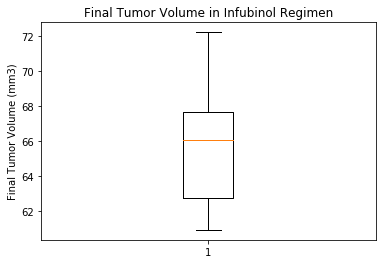

In [114]:
inf_data_df = max_df[max_df['Drug Regimen'].isin(['Infubinol'])]
inf_data_df




inf_list = inf_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_list = inf_list["Tumor Volume (mm3)"]
inf_list

quartiles = inf_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(inf_list)
plt.show()

The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The the median of temperatures is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


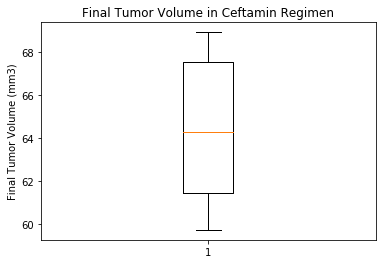

In [115]:
cef_data_df = max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]
cef_list


cef_list = cef_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_list = cef_list["Tumor Volume (mm3)"]
cef_list


quartiles = cef_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cef_list)
plt.show()

In [116]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
import plotly.express as px

trace0 = go.Box(
        y = cap_list,
        name = "Capomulin"
)
trace1 = go.Box(
        y = ram_list,
        name = "Ramicane"
)
trace2 = go.Box(
        y = inf_list,
        name = "Infubinol"
)
trace3 = go.Box(
        y = cef_list,
        name = "Ceftamin"
)

ModuleNotFoundError: No module named 'plotly'

In [129]:
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(title = "Final tumor volume for the four most promising treatment regimens")


fig = go.Figure(data=data, layout=layout)

pyo.plot(fig)

NameError: name 'trace0' is not defined

## Line and Scatter Plots

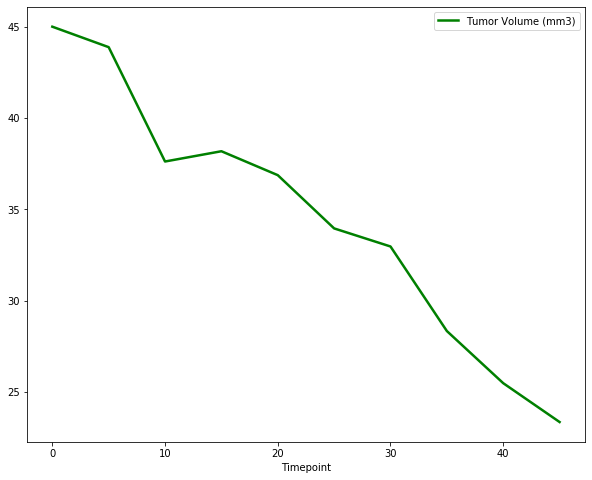

In [117]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_df = complete_data.loc[complete_data["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df


cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df




cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

cap_single_df = cap_single_df.reset_index(drop=True)

cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='green')

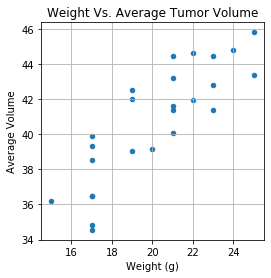

In [118]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_df.head()

reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reduced_df.head()



average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap.head()


average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap.head()


average_cap = average_cap.set_index('Mouse ID')


average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()
plt.clf()
plt.cla()
plt.close()





## Correlation and Regression

In [121]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

import seaborn as sns
from scipy import stats

mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


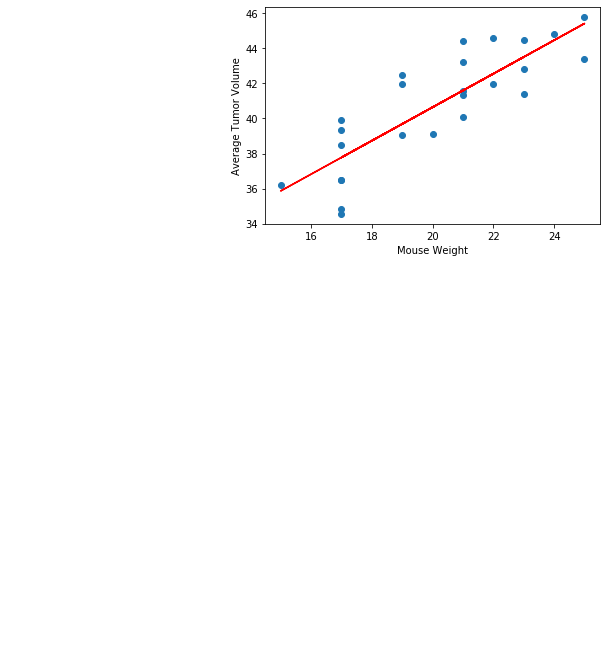

In [128]:
x_values = average_cap['Weight (g)']
y_values = average_cap['Average Volume']
(slope, intercept, r_value, p_value, std_err) = stats.linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()